Md. Tanvir Jawad<br>ID: 21101221

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [2]:
from modsim import *

In [3]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap11.py')

In [4]:
from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/AllenDowney/ModSimPy/master/data/glucose_insulin.csv', index_col='time')

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

**MODIFICATION**

This allows us to create instances of the HIV model with different parameter values and simulate them independently:

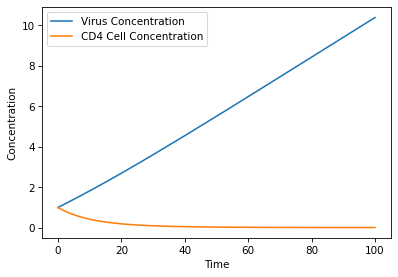

In [7]:
class HIVModel:
    def __init__(self, alpha, beta, delta, gamma, V0, T0):
        self.alpha = alpha
        self.beta = beta
        self.delta = delta
        self.gamma = gamma
        self.V0 = V0
        self.T0 = T0

    def hiv_model(self, y, t):
        V, T = y
        dVdt = self.alpha - self.beta * V * T
        dTdt = self.delta * T * V - self.gamma * T
        return [dVdt, dTdt]

    def simulate(self, total_time, num_points):

        t = np.linspace(0, total_time, num_points)

        solution = odeint(self.hiv_model, [self.V0, self.T0], t)

        V, T = solution.T
        plt.plot(t, V, label='Virus Concentration')
        plt.plot(t, T, label='CD4 Cell Concentration')
        plt.xlabel('Time')
        plt.ylabel('Concentration')
        plt.legend()
        plt.show()

alpha = 0.1
beta = 0.02
delta = 0.01
gamma = 0.1
V0 = 1.0
T0 = 1.0
total_time = 100
num_points = 1000

hiv_model_instance = HIVModel(alpha, beta, delta, gamma, V0, T0)
hiv_model_instance.simulate(total_time, num_points)
